## Подключение библиотек и скриптов

In [1]:
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold, GridSearchCV

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')
sns.set_context("paper", font_scale=1.5)  
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_rows', 50)

#### Пути к директориям и файлам

In [4]:
TRAIN_DATASET_PATH = 'project/train.csv'
TEST_DATASET_PATH = 'project/test.csv'

## Загрузка данных

**Описание датасета**

* **Id** - идентификационный номер квартиры
* **DistrictId** - идентификационный номер района
* **Rooms** - количество комнат
* **Square** - площадь
* **LifeSquare** - жилая площадь
* **KitchenSquare** - площадь кухни
* **Floor** - этаж
* **HouseFloor** - количество этажей в доме
* **HouseYear** - год постройки дома
* **Ecology_1, Ecology_2, Ecology_3** - экологические показатели местности
* **Social_1, Social_2, Social_3** - социальные показатели местности
* **Healthcare_1, Helthcare_2** - показатели местности, связанные с охраной здоровья
* **Shops_1, Shops_2** - показатели, связанные с наличием магазинов, торговых центров
* **Price** - цена квартиры

In [5]:
train_df = pd.read_csv(TRAIN_DATASET_PATH, index_col='Id')
train_df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
14038,35,2.00,47.98,29.44,6.00,7,9.00,1969,0.09,B,B,33,7976,5,nan,0,11,B,"184,966.93"
15053,41,3.00,65.68,40.05,8.00,7,9.00,1978,0.00,B,B,46,10309,1,240.00,1,16,B,"300,009.45"
4765,53,2.00,44.95,29.20,0.00,8,12.00,1968,0.05,B,B,34,7759,0,229.00,1,3,B,"220,925.91"
5809,58,2.00,53.35,52.73,9.00,8,17.00,1977,0.44,B,B,23,5735,3,"1,084.00",0,5,B,"175,616.23"
10783,99,1.00,39.65,23.78,7.00,11,12.00,1976,0.01,B,B,35,5776,1,"2,078.00",2,4,B,"150,226.53"


In [6]:
test_df = pd.read_csv(TEST_DATASET_PATH, index_col='Id')
test_df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
Id,,,,,,,,,,,,,,,,,,
725,58,2.00,49.88,33.43,6.00,6,14.00,1972,0.31,B,B,11,2748,1,nan,0,0,B
15856,74,2.00,69.26,nan,1.00,6,1.00,1977,0.08,B,B,6,1437,3,nan,0,2,B
5480,190,1.00,13.60,15.95,12.00,2,5.00,1909,0.00,B,B,30,7538,87,"4,702.00",5,5,B
15664,47,2.00,73.05,51.94,9.00,22,22.00,2007,0.10,B,B,23,4583,3,nan,3,3,B
14275,27,1.00,47.53,43.39,1.00,17,17.00,2017,0.07,B,B,2,629,1,nan,0,0,A


In [7]:
train_df.shape, test_df.shape

((10000, 19), (5000, 18))

### Приведение типов

In [8]:
train_df.dtypes

DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [9]:
test_df.dtypes

DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
dtype: object

In [13]:
train_df['DistrictId'] = train_df['DistrictId'].astype(str)
test_df['DistrictId'] = test_df['DistrictId'].astype(str)

## Обзор данных

### Целевая переменная

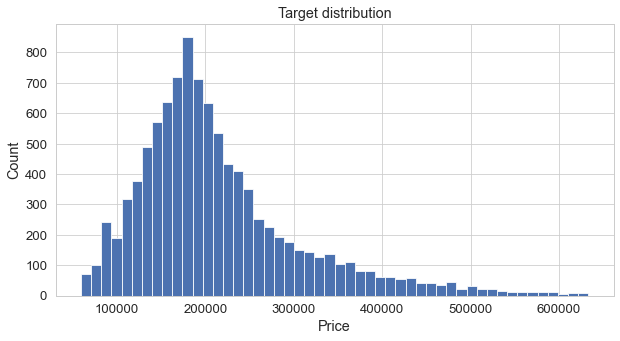

In [10]:
plt.figure(figsize = (10, 5))

train_df['Price'].hist(bins=50)
plt.ylabel('Count')
plt.xlabel('Price')
plt.title('Target distribution');

## Количественные переменные

In [11]:
train_df.nunique()

DistrictId         205
Rooms                9
Square           10000
LifeSquare        7887
KitchenSquare       58
Floor               33
HouseFloor          44
HouseYear           97
Ecology_1          129
Ecology_2            2
Ecology_3            2
Social_1            51
Social_2           142
Social_3            30
Healthcare_1        79
Helthcare_2          7
Shops_1             16
Shops_2              2
Price            10000
dtype: int64

In [12]:
test_df.nunique()

DistrictId        201
Rooms               8
Square           5000
LifeSquare       3959
KitchenSquare      38
Floor              35
HouseFloor         41
HouseYear          97
Ecology_1         130
Ecology_2           2
Ecology_3           2
Social_1           51
Social_2          143
Social_3           30
Healthcare_1       79
Helthcare_2         7
Shops_1            16
Shops_2             2
dtype: int64

In [14]:
feature_num_names = train_df.drop('Price', axis=1).select_dtypes(include=['float64', 'int64']).\
        columns.tolist()
feature_num_names

['Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1']

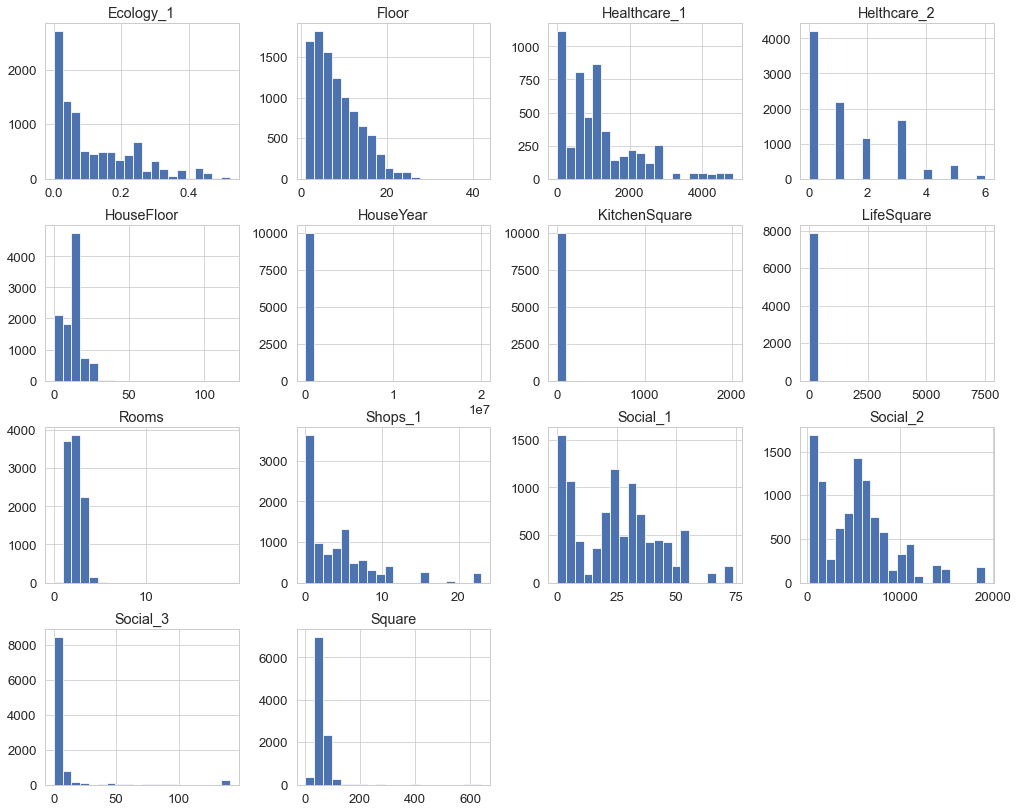

In [15]:
train_df[feature_num_names].hist(figsize=(17,14), bins=20, grid=True);

In [23]:
feature_num_names_test = test_df.select_dtypes(include=['float64', 'int64']).\
        columns.tolist()
feature_num_names_test

['Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1']

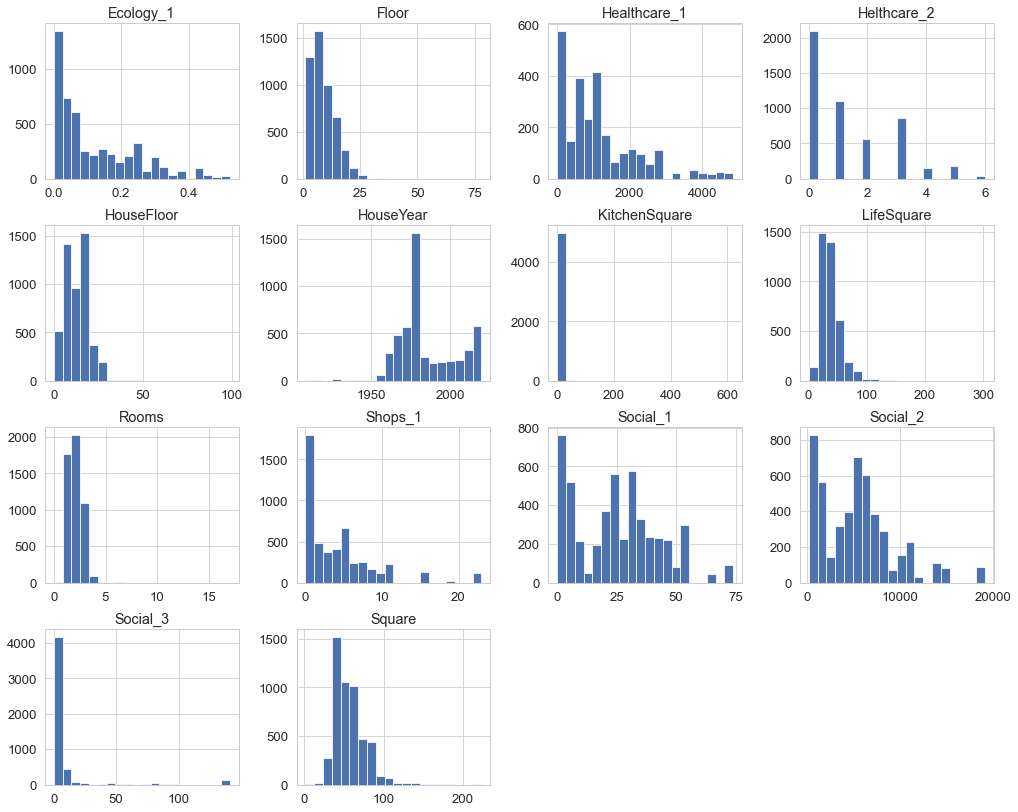

In [24]:
test_df[feature_num_names_test].hist(figsize=(17,14), bins=20, grid=True);

### Категориальные переменные

In [16]:
feature_cat_names = train_df.select_dtypes(include='object').columns.tolist()
feature_cat_names

['DistrictId', 'Ecology_2', 'Ecology_3', 'Shops_2']

In [17]:
train_df['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

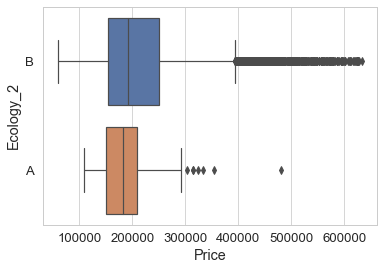

In [18]:
sns.boxplot('Price', 'Ecology_2', data=train_df);

In [19]:
test_df['Ecology_2'].value_counts()

B    4952
A      48
Name: Ecology_2, dtype: int64

In [21]:
train_df['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

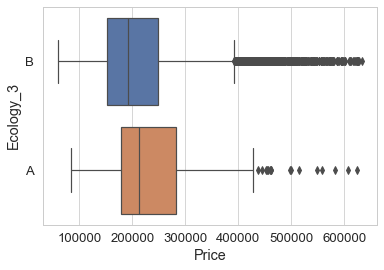

In [22]:
sns.boxplot('Price', 'Ecology_3', data=train_df);

In [23]:
test_df['Ecology_3'].value_counts()

B    4851
A     149
Name: Ecology_3, dtype: int64

In [24]:
train_df['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

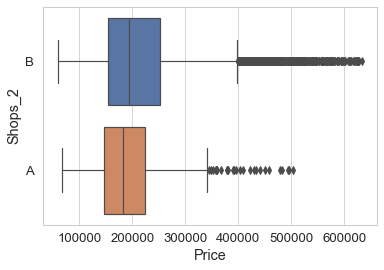

In [25]:
sns.boxplot('Price', 'Shops_2', data=train_df);

In [26]:
test_df['Shops_2'].value_counts()

B    4588
A     412
Name: Shops_2, dtype: int64

In [27]:
feature_bin_names = ['Ecology_2', 'Ecology_3', 'Shops_2']

train_df[feature_bin_names] = train_df[feature_bin_names].replace({'A':0, 'B':1})
test_df[feature_bin_names] = test_df[feature_bin_names].replace({'A':0, 'B':1})

train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 14038 to 6306
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     10000 non-null  object 
 1   Rooms          10000 non-null  float64
 2   Square         10000 non-null  float64
 3   LifeSquare     7887 non-null   float64
 4   KitchenSquare  10000 non-null  float64
 5   Floor          10000 non-null  int64  
 6   HouseFloor     10000 non-null  float64
 7   HouseYear      10000 non-null  int64  
 8   Ecology_1      10000 non-null  float64
 9   Ecology_2      10000 non-null  int64  
 10  Ecology_3      10000 non-null  int64  
 11  Social_1       10000 non-null  int64  
 12  Social_2       10000 non-null  int64  
 13  Social_3       10000 non-null  int64  
 14  Healthcare_1   5202 non-null   float64
 15  Helthcare_2    10000 non-null  int64  
 16  Shops_1        10000 non-null  int64  
 17  Shops_2        10000 non-null  int64  
 18  Pri

In [28]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 725 to 12504
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     5000 non-null   object 
 1   Rooms          5000 non-null   float64
 2   Square         5000 non-null   float64
 3   LifeSquare     3959 non-null   float64
 4   KitchenSquare  5000 non-null   float64
 5   Floor          5000 non-null   int64  
 6   HouseFloor     5000 non-null   float64
 7   HouseYear      5000 non-null   int64  
 8   Ecology_1      5000 non-null   float64
 9   Ecology_2      5000 non-null   int64  
 10  Ecology_3      5000 non-null   int64  
 11  Social_1       5000 non-null   int64  
 12  Social_2       5000 non-null   int64  
 13  Social_3       5000 non-null   int64  
 14  Healthcare_1   2623 non-null   float64
 15  Helthcare_2    5000 non-null   int64  
 16  Shops_1        5000 non-null   int64  
 17  Shops_2        5000 non-null   int64  
dtypes: fl

#### Helthcare_2

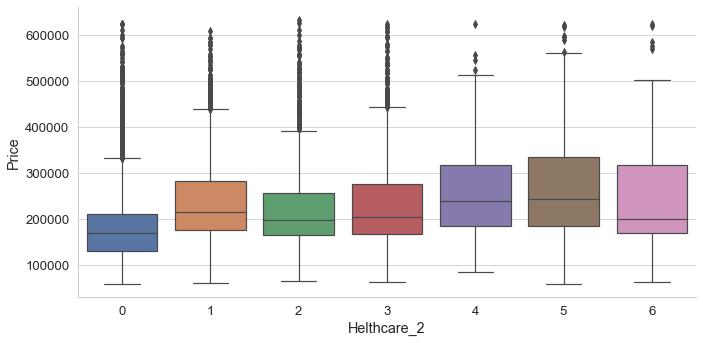

In [29]:
sns.catplot('Helthcare_2', 'Price', kind="box", data=train_df, aspect=2/1);

### Обработка пропусков

In [30]:
train_df.isna().sum()[train_df.isna().sum() != 0]

LifeSquare      2113
Healthcare_1    4798
dtype: int64

In [31]:
test_df.isna().sum()[test_df.isna().sum() != 0]

LifeSquare      1041
Healthcare_1    2377
dtype: int64

#### LifeSquare

Замена отсутствующих данных LifeSquare на Square - KitchenSquare

In [40]:
train_df.loc[train_df['LifeSquare'].isna(), 'LifeSquare'] = \
    train_df.loc[train_df['LifeSquare'].isna(), 'Square'] - train_df.loc[train_df['LifeSquare'].isna(), 'KitchenSquare']

In [41]:
test_df.loc[test_df['LifeSquare'].isna(), 'LifeSquare'] = \
    test_df.loc[test_df['LifeSquare'].isna(), 'Square'] - test_df.loc[test_df['LifeSquare'].isna(), 'KitchenSquare']

#### Healthcare_1

Замена отсутствующих значений на медианы Healthcare_1 по группам Helthcare_2. В предположении, что это будет ближе к реальности чем одно значение медианы для всех пропусков. И поскольку между этими признаками есть небольшая корреляция, и групп Healthcare_2 немного

In [43]:
train_df.groupby(['Helthcare_2'])['Healthcare_1'].median()

Helthcare_2
0     540.00
1     620.00
2     750.00
3   1,145.00
4   1,894.00
5   1,575.00
6     645.00
Name: Healthcare_1, dtype: float64

In [44]:
train_df.loc[train_df['Healthcare_1'].isna(), 'Healthcare_1'] =\
train_df.groupby(['Helthcare_2'])['Healthcare_1'].transform(lambda x: x.median())

In [45]:
test_df.loc[test_df['Healthcare_1'].isna(), 'Healthcare_1'] =\
test_df.groupby(['Helthcare_2'])['Healthcare_1'].transform(lambda x: x.median())

## Обработка выбросов

#### Square, LifeSquare, KitchenSquare

Для строк с LifeSquare большей Square замена LifeSquare на Square - KitchenSquare

In [48]:
train_df[train_df['LifeSquare'] > train_df['Square']]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
8054,23,1.00,42.53,43.97,1.00,3,9.00,2014,0.03,1,1,0,168,0,540.00,0,0,1,"95,338.20"
10521,38,3.00,104.21,106.34,0.00,20,0.00,2017,0.06,1,1,15,2787,2,520.00,0,7,1,"435,462.05"
2301,1,2.00,61.40,65.22,0.00,17,22.00,2016,0.01,1,1,1,264,0,540.00,0,1,1,"199,215.45"
8753,25,3.00,85.95,89.80,1.00,4,3.00,2017,0.07,1,1,53,13670,4,620.00,1,11,1,"309,688.59"
9870,62,1.00,51.83,53.49,1.00,5,1.00,2015,0.07,1,1,2,629,1,540.00,0,0,0,"131,797.47"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,30,2.00,59.02,59.44,12.00,5,5.00,2016,0.00,1,1,22,6398,141,"1,046.00",3,23,1,"126,281.14"
12918,23,2.00,51.44,53.13,51.00,3,17.00,2017,0.01,1,1,1,388,0,540.00,0,0,1,"88,150.01"
2737,27,3.00,123.43,125.81,123.00,5,10.00,2015,0.02,1,1,2,469,0,540.00,0,0,1,"234,194.84"


In [49]:
test_df[test_df['LifeSquare'] > test_df['Square']]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
Id,,,,,,,,,,,,,,,,,,
5480,190,1.00,13.60,15.95,12.00,2,5.00,1909,0.00,1,1,30,7538,87,"4,702.00",5,5,1
11160,58,1.00,48.61,48.75,1.00,4,3.00,1977,0.44,1,1,23,5735,3,"1,084.00",0,5,1
6624,27,1.00,42.41,42.43,10.00,12,17.00,2017,0.01,1,1,4,915,0,540.00,0,0,1
11513,1,1.00,37.48,40.59,0.00,4,17.00,1977,0.01,1,1,1,264,0,540.00,0,1,1
1872,30,2.00,52.45,52.80,1.00,17,17.00,2016,0.00,1,1,22,6398,141,"1,046.00",3,23,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14686,1,3.00,77.23,79.96,1.00,18,17.00,1977,0.01,1,1,1,264,0,540.00,0,1,1
3711,94,1.00,41.28,42.39,10.00,13,13.00,2014,0.28,1,1,33,8667,2,540.00,0,6,1
5820,94,1.00,33.68,34.20,1.00,10,9.00,1972,0.13,1,1,43,8429,3,"1,145.00",3,9,1


In [50]:
train_df.loc[train_df['LifeSquare'] > train_df['Square'], 'LifeSquare'] = \
    train_df.loc[train_df['LifeSquare'] > train_df['Square'], 'Square'] - train_df.loc[train_df['LifeSquare'] > train_df['Square'], 'KitchenSquare']

In [51]:
test_df.loc[test_df['LifeSquare'] > test_df['Square'], 'LifeSquare'] = \
    test_df.loc[test_df['LifeSquare'] > test_df['Square'], 'Square'] - test_df.loc[test_df['LifeSquare'] > test_df['Square'], 'KitchenSquare']

Для строк с KitchenSquare большей Square замена на Square - LifeSquare

In [52]:
train_df[train_df['KitchenSquare'] > train_df['Square']]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
14656,62,1.00,47.10,46.45,"2,014.00",4,1.00,2014,0.07,1,1,2,629,1,540.00,0,0,0,"108,337.48"
13703,42,1.00,38.07,19.72,73.00,9,10.00,2006,0.16,1,1,21,5731,0,620.00,1,0,1,"160,488.03"
6569,27,1.00,38.22,18.72,84.00,4,17.00,2018,0.01,1,1,4,915,0,540.00,0,0,1,"99,079.96"
14679,81,1.00,32.28,19.28,"1,970.00",6,1.00,1977,0.01,1,1,30,5285,0,645.00,6,6,1,"105,539.56"


In [53]:
train_df.loc[train_df['KitchenSquare'] > train_df['Square'], 'KitchenSquare'] = \
   train_df.loc[train_df['KitchenSquare'] > train_df['Square'], 'Square'] - train_df.loc[train_df['KitchenSquare'] > train_df['Square'], 'LifeSquare']

In [54]:
test_df[test_df['KitchenSquare'] > test_df['Square']]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
Id,,,,,,,,,,,,,,,,,,
14594,11,2.00,42.80,24.22,620.00,11,14.00,1972,0.04,1,1,28,6533,1,"1,015.00",2,5,1
10662,29,1.00,25.96,17.25,33.00,5,5.00,1973,0.07,1,1,31,6119,4,620.00,1,2,1
3194,29,2.00,43.93,31.03,44.00,6,5.00,1964,0.09,1,1,10,2277,2,"1,547.00",0,0,1
12640,6,2.00,54.63,31.49,97.00,4,17.00,2015,0.24,1,1,5,1564,0,540.00,0,0,1


In [55]:
test_df.loc[test_df['KitchenSquare'] > test_df['Square'], 'KitchenSquare'] = \
   test_df.loc[test_df['KitchenSquare'] > test_df['Square'], 'Square'] - test_df.loc[test_df['KitchenSquare'] > test_df['Square'], 'LifeSquare']

In [56]:
train_df[['Square', 'LifeSquare', 'KitchenSquare']].describe()

,Square,LifeSquare,KitchenSquare
count,"10,000.00","10,000.00","10,000.00"
mean,56.32,40.71,5.86
std,21.06,22.13,5.07
min,1.14,0.14,0.00
25%,41.77,25.35,1.00
50%,52.51,36.71,6.00
75%,65.90,49.52,9.00
max,641.07,638.16,123.00


In [57]:
test_df[['Square', 'LifeSquare', 'KitchenSquare']].describe()

,Square,LifeSquare,KitchenSquare
count,"5,000.00","5,000.00","5,000.00"
mean,56.45,40.55,5.83
std,19.09,19.76,4.64
min,1.38,0.11,0.00
25%,41.91,25.74,1.00
50%,52.92,36.72,6.00
75%,66.29,49.73,9.00
max,223.45,168.73,112.00


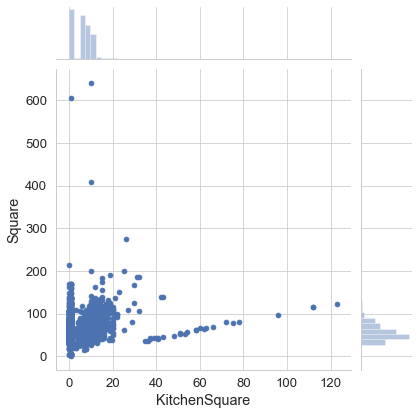

In [58]:
sns.jointplot(train_df['KitchenSquare'], train_df['Square'], kind='scatter', height=6);

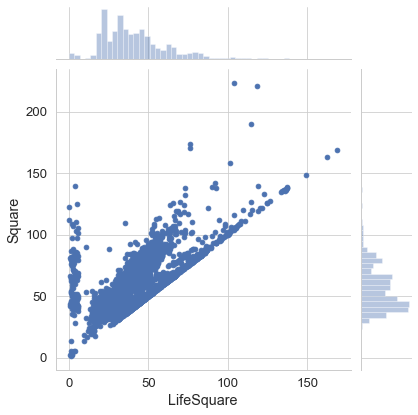

In [61]:
sns.jointplot(test_df['LifeSquare'], test_df['Square'], kind='scatter', height=6);

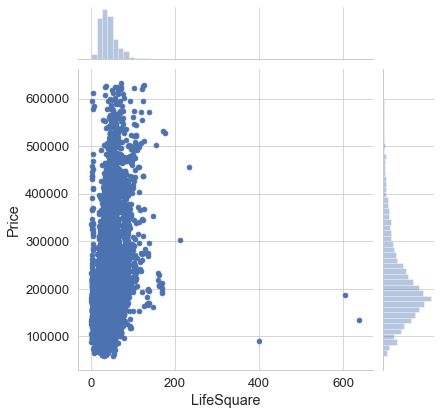

In [60]:
sns.jointplot(train_df['LifeSquare'], train_df['Price'], kind='scatter', height=6);

#### Rooms

In [62]:
train_df['Rooms'].value_counts()

2.00     3880
1.00     3705
3.00     2235
4.00      150
5.00       18
0.00        8
10.00       2
19.00       1
6.00        1
Name: Rooms, dtype: int64

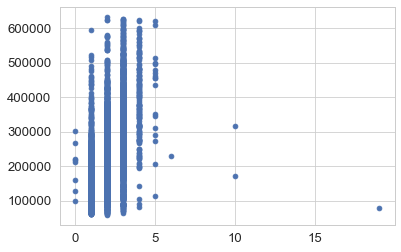

In [63]:
plt.scatter(train_df['Rooms'], train_df['Price']);

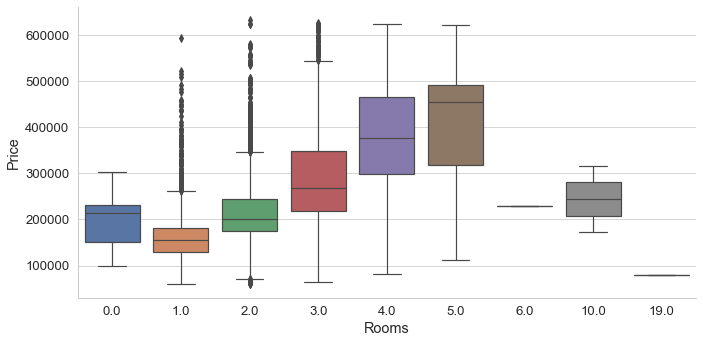

In [64]:
sns.catplot('Rooms', 'Price', kind="box", data=train_df, aspect=2/1);

In [65]:
test_df['Rooms'].value_counts()

2.00     2030
1.00     1769
3.00     1099
4.00       90
5.00        7
0.00        2
6.00        2
17.00       1
Name: Rooms, dtype: int64

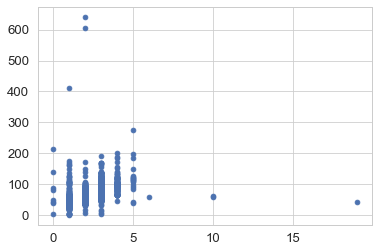

In [66]:
plt.scatter(train_df['Rooms'], train_df['Square']);

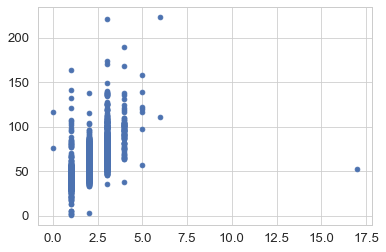

In [66]:
plt.scatter(test_df['Rooms'], test_df['Square']);

In [67]:
train_df['Rooms'].mode()[0]

2.0

In [ ]:
Замена выпадающих и нулевых значений на моду выглядит оптимальной по графику catplot

In [68]:
train_df.loc[(train_df['Rooms'] > 5)|(train_df['Rooms'] == 0), 'Rooms'] = train_df['Rooms'].mode()[0]
test_df.loc[(test_df['Rooms'] > 5)|(test_df['Rooms'] == 0), 'Rooms'] = train_df['Rooms'].mode()[0]

#### HouseFloor, Floor

In [ ]:
Для случаев этажности дома ниже этажа квартиры замена этажности дома на этаж квартиры

In [74]:
train_df[train_df['HouseFloor'] < train_df['Floor']]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
11993,74,2.00,80.31,80.31,0.00,14,0.00,1977,0.08,1,1,6,1437,3,540.00,0,2,1,"221,244.16"
10953,27,1.00,53.77,52.41,1.00,5,4.00,1977,0.07,1,1,2,629,1,540.00,0,0,0,"140,647.57"
2119,27,2.00,49.36,31.99,5.00,6,5.00,1983,0.05,1,1,5,1227,0,540.00,0,0,1,"117,000.38"
11935,27,2.00,64.71,63.71,1.00,15,1.00,1977,0.21,1,1,9,1892,0,540.00,0,1,1,"127,200.03"
6641,54,3.00,118.91,118.91,0.00,2,0.00,1977,0.01,1,1,30,5285,0,645.00,6,6,1,"571,069.05"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2237,52,3.00,64.07,47.63,6.00,11,9.00,1983,0.37,1,1,34,7065,1,750.00,2,5,1,"226,434.88"
16159,27,1.00,38.97,37.97,1.00,10,1.00,1977,0.21,1,1,9,1892,0,540.00,0,1,1,"95,529.57"
4145,96,3.00,90.06,47.86,11.00,26,24.00,2005,0.04,1,1,53,14892,4,620.00,1,4,1,"441,108.91"


In [75]:
test_df[test_df['HouseFloor'] < test_df['Floor']]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
Id,,,,,,,,,,,,,,,,,,
15856,74,2.00,69.26,68.26,1.00,6,1.00,1977,0.08,1,1,6,1437,3,540.00,0,2,1
15975,61,3.00,64.54,42.65,7.00,10,9.00,1981,0.30,1,1,52,10311,6,620.00,1,9,1
5214,27,1.00,37.56,36.56,1.00,5,1.00,1977,0.21,1,1,9,1892,0,540.00,0,1,1
12694,27,3.00,83.67,46.36,0.00,8,0.00,2015,0.07,1,1,2,629,1,540.00,0,0,0
8968,27,2.00,69.85,69.85,0.00,3,0.00,1977,0.01,1,1,4,915,0,540.00,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4723,95,1.00,45.54,45.54,0.00,6,0.00,1977,0.00,1,1,14,3369,24,"4,129.00",0,3,1
2591,39,2.00,44.20,30.19,6.00,10,9.00,1972,0.43,1,1,25,5011,8,730.00,0,2,1
14562,113,2.00,46.63,27.06,5.00,6,5.00,1969,0.31,1,0,30,5048,9,325.00,2,5,1


In [77]:
train_df.loc[train_df['HouseFloor'] < train_df['Floor'], 'HouseFloor'] = train_df['Floor']

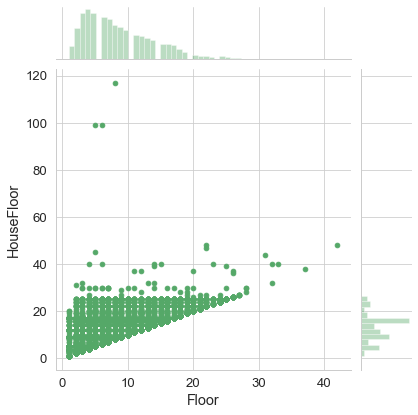

In [78]:
sns.jointplot(train_df['Floor'], train_df['HouseFloor'], kind='scatter', height=6, color='g');

In [79]:
test_df.loc[test_df['HouseFloor'] < test_df['Floor'], 'HouseFloor'] = test_df['Floor']

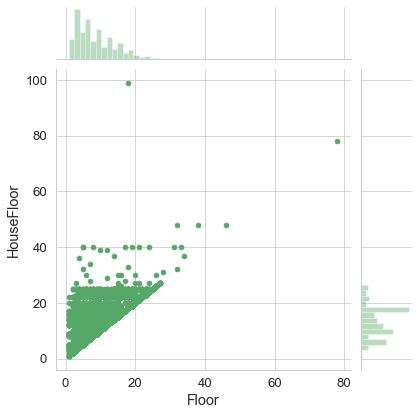

In [80]:
sns.jointplot(test_df['Floor'], test_df['HouseFloor'], kind='scatter', height=6, color='g');

#### HouseYear

In [81]:
train_df['HouseYear'].sort_values(ascending=False)

Id
10814    20052011
11607        4968
6731         2020
8892         2020
14318        2020
           ...   
7920         1916
6751         1914
2085         1912
14556        1912
13288        1910
Name: HouseYear, Length: 10000, dtype: int64

In [83]:
test_df['HouseYear'].sort_values(ascending=False)

Id
2359     2020
8311     2020
8560     2020
9398     2020
4696     2020
         ... 
16217    1912
3726     1911
9076     1910
5480     1909
12316    1908
Name: HouseYear, Length: 5000, dtype: int64

In [84]:
train_df.loc[train_df['HouseYear'] > 2020, 'HouseYear'] = 2020

## Построение новых признаков

### PriceOneM2ByDistrict
цена квадратного метра по районам

In [85]:
train_df['PriceOneM2'] = train_df['Price'] / train_df['Square']

In [86]:
train_df['PriceOneM2'].describe()

count    10,000.00
mean      3,988.38
std       3,755.44
min         208.29
25%       2,918.53
50%       3,910.05
75%       4,692.38
max     230,463.54
Name: PriceOneM2, dtype: float64

In [87]:
price_by_district = train_df.groupby(['DistrictId'], as_index=False)\
                        .agg({'PriceOneM2':'median'})\
                        .rename(columns={'PriceOneM2':'PriceOneM2ByDistrict'})

price_by_district

,DistrictId,PriceOneM2ByDistrict
0,0,"3,935.91"
1,1,"3,251.65"
2,10,"4,458.89"
3,100,"4,933.39"
4,101,"4,188.41"
...,...,...
200,95,"5,496.39"
201,96,"4,025.34"
202,97,"4,942.57"
203,98,"4,444.98"


In [88]:
train_df = train_df.merge(price_by_district, on=['DistrictId'], how='left').set_index(train_df.index)
test_df = test_df.merge(price_by_district, on=['DistrictId'], how='left').set_index(test_df.index)

In [183]:
test_df['PriceOneM2ByDistrict'].sort_values(ascending=False)

Id
2262    8,700.77
6216    8,700.77
5480    8,645.17
7440    8,645.17
2216    8,008.60
          ...   
9155         nan
8845         nan
15655        nan
13382        nan
14024        nan
Name: PriceOneM2ByDistrict, Length: 5000, dtype: float64

Замена nan в PriceOneM2ByDistrict на медиану

In [185]:
test_df.loc[test_df['PriceOneM2ByDistrict'].isna(), 'PriceOneM2ByDistrict'] = \
   train_df['PriceOneM2ByDistrict'].median()

### RoomSquare
площадь комнаты

In [91]:
train_df['RoomSquare'] = train_df['Square'] / train_df['Rooms']
test_df['RoomSquare'] = test_df['Square'] / test_df['Rooms']

### PriceOneM2BySocial1
Цена квадратного метра по категориям Social_1

In [92]:
price_by_social1 = train_df.groupby(['Social_1'], as_index=False)\
                        .agg({'PriceOneM2':'median'})\
                        .rename(columns={'PriceOneM2':'PriceOneMBySocial1'})

price_by_social1

,Social_1,PriceOneMBySocial1
0,0,"2,089.43"
1,1,"3,170.96"
2,2,"2,740.82"
3,3,"2,385.80"
4,4,"2,648.65"
...,...,...
46,50,"5,002.39"
47,52,"4,531.66"
48,53,"4,110.27"
49,66,"4,087.62"


In [93]:
train_df = train_df.merge(price_by_social1, on=['Social_1'], how='left').set_index(train_df.index)
test_df = test_df.merge(price_by_social1, on=['Social_1'], how='left').set_index(test_df.index)

In [94]:
train_df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,PriceOneM2,PriceOneM2ByDistrict,RoomSquare,PriceOneMBySocial1
Id,,,,,,,,,,,,,,,,,,,,,
14038,35,2.00,47.98,29.44,6.00,7,9.00,1969,0.09,1,...,5,540.00,0,11,1,"184,966.93","3,854.96","4,358.27",23.99,"4,455.06"
15053,41,3.00,65.68,40.05,8.00,7,9.00,1978,0.00,1,...,1,240.00,1,16,1,"300,009.45","4,567.49","4,437.30",21.89,"4,807.59"
4765,53,2.00,44.95,29.20,0.00,8,12.00,1968,0.05,1,...,0,229.00,1,3,1,"220,925.91","4,915.15","4,845.92",22.47,"4,191.95"
5809,58,2.00,53.35,52.73,9.00,8,17.00,1977,0.44,1,...,3,"1,084.00",0,5,1,"175,616.23","3,291.59","2,949.98",26.68,"4,639.85"
10783,99,1.00,39.65,23.78,7.00,11,12.00,1976,0.01,1,...,1,"2,078.00",2,4,1,"150,226.53","3,788.89","3,992.03",39.65,"4,257.37"


In [95]:
test_df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,PriceOneM2ByDistrict,RoomSquare,PriceOneMBySocial1
Id,,,,,,,,,,,,,,,,,,,,,
725,58,2.00,49.88,33.43,6.00,6,14.00,1972,0.31,1,...,11,2748,1,540.00,0,0,1,"2,949.98",24.94,"3,253.80"
15856,74,2.00,69.26,68.26,1.00,6,6.00,1977,0.08,1,...,6,1437,3,540.00,0,2,1,"3,319.32",34.63,"2,730.89"
5480,190,1.00,13.60,1.60,12.00,2,5.00,1909,0.00,1,...,30,7538,87,"4,702.00",5,5,1,"8,645.17",13.60,"4,302.80"
15664,47,2.00,73.05,51.94,9.00,22,22.00,2007,0.10,1,...,23,4583,3,"1,145.00",3,3,1,"4,181.96",36.52,"4,639.85"
14275,27,1.00,47.53,43.39,1.00,17,17.00,2017,0.07,1,...,2,629,1,540.00,0,0,0,"2,761.27",47.53,"2,740.82"


## Отбор признаков

In [189]:
train_df.to_csv('train_prepared.csv')
test_df.to_csv('test_prepared.csv')

In [190]:
feature_names = train_df.columns
feature_names.tolist()

['DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price',
 'PriceOneM2',
 'PriceOneM2ByDistrict',
 'RoomSquare',
 'PriceOneMBySocial1']

In [251]:
target_name = ['Price']
feature_names = [
# 'DistrictId', снижает R2
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
# 'Ecology_2',
# 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
# 'Price',
# 'PriceOneM2',
 'PriceOneM2ByDistrict',
# 'RoomSquare', - важность последних 2-х признаков высокая, но без них R2 выше
# 'PriceOneMBySocial1' 
]

In [242]:
X = train_df[feature_names]
y = train_df[target_name]

X_test = test_df[feature_names]

In [243]:
len(feature_names)

16

## Построение модели

#### Перекрестная проверка модели

In [244]:
print(X.shape, y.shape, X_test.shape)

(10000, 16) (10000, 1) (5000, 16)


In [245]:
forest = RandomForestRegressor(max_depth=15, 
                               max_features=5, 
                               n_estimators=200,
                               random_state=42)

In [246]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)

cv_score = cross_val_score(forest, X, y, scoring='r2', cv=kf)
print('R2: {:.5f}'.format(cv_score.mean()))
# R2: 0.76573

R2: 0.76573


#### Важность признаков

In [247]:
forest.fit(X, y)
importances = forest.feature_importances_
feat_importances = pd.Series(importances, index=feature_names)
feat_importances.sort_values(ascending=True, inplace=True)

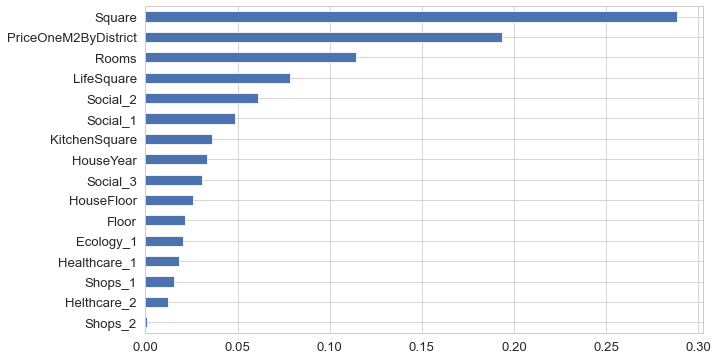

In [248]:
feat_importances.plot(kind='barh', figsize=(10, 6));

#### Настройка гиперпараметров модели

In [249]:
params = {
    'n_estimators': [200],
    'max_depth': [15,16,17],
    'max_features': [5,6,7]
}

In [250]:
forest_grid = GridSearchCV(forest, params, scoring='r2', 
                  cv=KFold(n_splits=10, random_state=42, shuffle=True), 
                  n_jobs=-1)
forest_grid.fit(X, y)
print(forest_grid.best_params_)
print('R2 на train: {:.5f}'.format(forest_grid.best_score_))
# время обработки 3 мин
# {'max_depth': 15, 'max_features': 5, 'n_estimators': 200}
# R2 на train: 0.76573

{'max_depth': 15, 'max_features': 5, 'n_estimators': 200}
R2 на train: 0.76573


In [147]:
# GradientBoostingRegressor показывает меньший R2 0.74661

## Прогнозирование на тестовом датасете

In [252]:
forest_best = forest_grid.best_estimator_

In [253]:
y_pred = forest_best.predict(X_test)

In [254]:
preds = pd.DataFrame()
preds['Id'] = X_test.index
preds['Price'] = y_pred
preds.head()

,Id,Price
0,725,"161,685.89"
1,15856,"231,525.19"
2,5480,"275,810.51"
3,15664,"306,480.99"
4,14275,"142,105.36"


In [255]:
preds.to_csv('AnnaRusinova_predicrions.csv', index=False)